<a href="https://colab.research.google.com/github/changsksu/IMSE_Data_Science/blob/main/ARIMA011.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This demo shows how to diagnose a time series and fit a ARIMA(0,1,1) model for an EWMA lambda-0.7 time series. 

In [ ]:
import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#the 2nd read option assume that the data file is rignt under your default google drive directory
# the sep-',' argument in the read statement should be used in some cases if ; does not work
data = pd.read_csv('https://raw.githubusercontent.com/changsksu/K-State-IMSE641/master/ARIMA011.csv', sep=',', na_values=".")
data.head() 

,Xt
0,10.000000
1,10.148397
2,10.766423
3,10.374677
4,11.243486


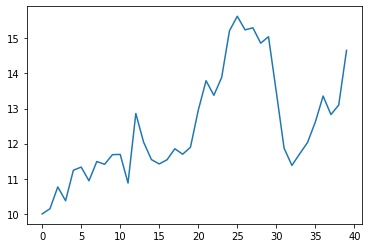

In [ ]:
# is this time series stationary?
plt.plot(data)

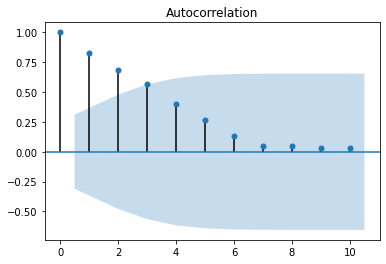

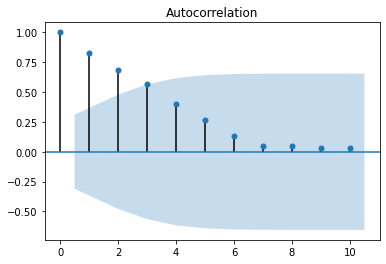

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data, lags=10)

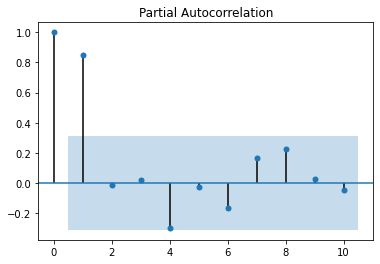

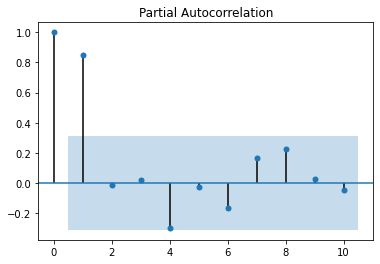

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data, lags=10)

From both acf and pacf plots above, acf shows a sin wave and pacf shows one spikes. The most likely ARIMA model is AR(1). However, the time series is generated from ARIMA(0,1,1) using EWMA lambda=0.7.

In [ ]:
!pip install statsmodels==0.12.1

     |████████████████████████████████| 9.5 MB 4.6 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


                               SARIMAX Results                                
Dep. Variable:                     Xt   No. Observations:                   40
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 -44.742
Date:                Wed, 06 Apr 2022   AIC                             95.483
Time:                        19:37:48   BIC                            100.550
Sample:                             0   HQIC                            97.315
                                 - 40                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.4294      0.880     14.125      0.000      10.705      14.154
ar.L1          0.9056      0.079     11.511      0.000       0.751       1.060
sigma2         0.5253      0.114      4.617      0.0

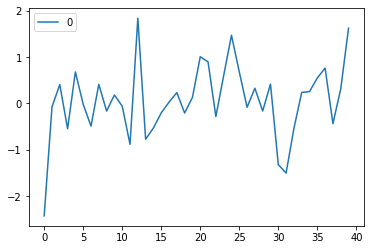

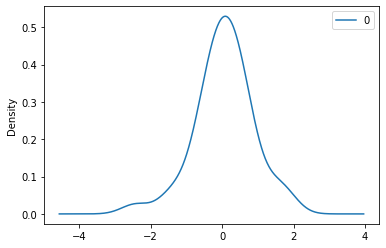

               0
count  40.000000
mean    0.055008
std     0.812302
min    -2.429405
25%    -0.324435
50%     0.075612
75%     0.446783
max     1.833183


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot
from pandas import DataFrame
# fit model
model = ARIMA(data, order=(1,0,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

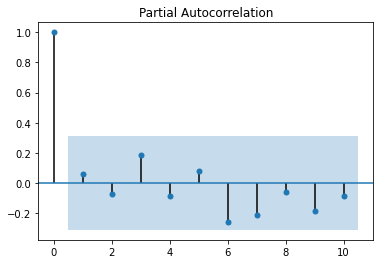

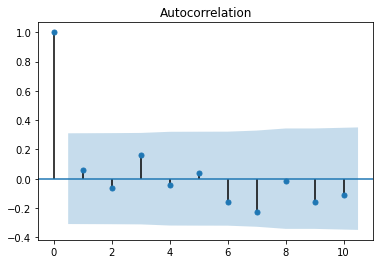

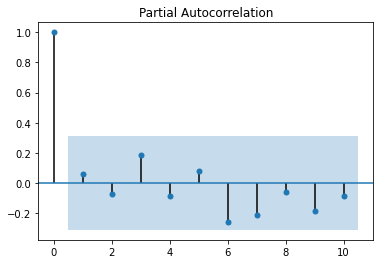

In [ ]:
# ACF & PACF plots on residuals time series
# plt.plot(data3)
plot_acf(residuals, lags=10)
plot_pacf(residuals, lags=10)

Both ACF and PACF show that residuals are pretty much within the boundaries so the AR(1) filter works.

# Now let's ARIMA(0,1,1) model

                               SARIMAX Results                                
Dep. Variable:                     Xt   No. Observations:                   40
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 -43.401
Date:                Wed, 06 Apr 2022   AIC                             90.802
Time:                        19:40:48   BIC                             94.129
Sample:                             0   HQIC                            91.996
                                 - 40                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0811      0.136      0.595      0.552      -0.186       0.348
sigma2         0.5421      0.108      5.028      0.000       0.331       0.753
Ljung-Box (L1) (Q):                   0.01   Jarque-

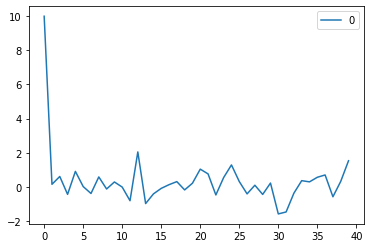

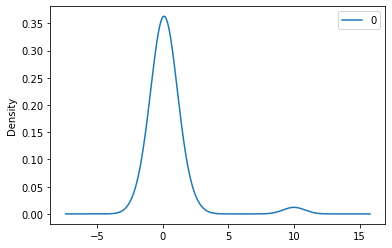

               0
count  40.000000
mean    0.055008
std     0.812302
min    -2.429405
25%    -0.324435
50%     0.075612
75%     0.446783
max     1.833183


In [ ]:
# fit ARIMA(0,1,1) model
model = ARIMA(data, order=(0,1,1))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals2 = DataFrame(model_fit.resid)
residuals2.plot()
pyplot.show()
# density plot of residuals
residuals2.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

The above ACF and PACF plots show that there is one spike in ACF and most PACF lines are in check. Most likely a AR(1) model will fit this time series well.

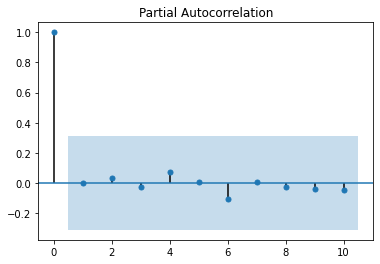

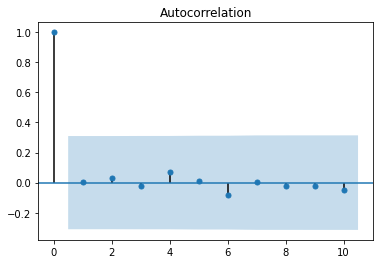

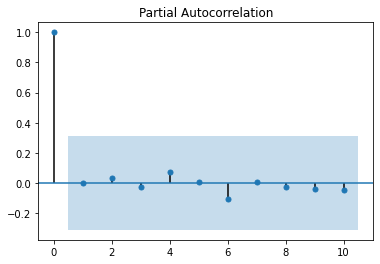

In [ ]:
# ACF & PACF plots on residuals time series
# plt.plot(data3)
plot_acf(residuals2, lags=10)
plot_pacf(residuals2, lags=10)

Comparing to both AR(1) and ARIMA(0,1,1) models, the ACF and PACF plots show that both models can successfully remove the autocorrelation effect. In this case, a simply model is preferred.